# Simulação de Parcelamento com Entrada Fixa e Juros Compostos

### Contextualização:
Uma loja de móveis deseja oferecer aos seus clientes diversas opções de pagamento para um produto cujo valor à vista é conhecido. Para facilitar a decisão, a equipe de Data Science da empresa foi solicitada a desenvolver uma simulação comparativa de parcelamento.

### Objetivo:
A simulação deve apresentar, para cada opção de parcelamento (de 1 até N parcelas), o valor total a ser pago, o impacto médio mensal no orçamento, o custo total percentual (acréscimo em relação ao valor à vista) e a taxa de juros implícita mensal.

### Modelo de Financiamento:

- Se o cliente optar pelo pagamento à vista (1 parcela), não há cobrança de juros; o valor total é igual ao montante.
- Para pagamentos parcelados (n ≥ 2), assume-se que o cliente paga uma parcela inicial fixa (entrada) e o restante é financiado com juros compostos.
- Fórmulas utilizadas: 
    - Para o financiamento dos (n) meses é: 
        * Valor Financiado = (Montante – Entrada) × (1 + Juros)ⁿ
    - Assim, o Valor Total a ser pago será: 
        * Valor Total = Entrada + Valor Financiado
    - E o Valor Mensal Médio (média dos pagamentos referentes ao valor financiado) será:
        * Valor Mensal = Valor Financiado / n
    - Por fim, o Custo Total (%) e a Taxa de Juros Implícita Mensal (%) são calculados respectivamente por:
        * Custo Total (%) = ((Valor Total / Montante) – 1) × 100
        * Taxa de Juros Implícita Mensal (%) = ((Valor Total – Montante) / Montante) / n × 100

### Parâmetros de Entrada:

- Montante (valor à vista do produto)
- Juros Mensal (taxa de juros cobrada no financiamento, em porcentagem)
- Número Máximo de Parcelas
- Valor da Primeira Parcela (entrada fixa)

Leia (ou defina) os parâmetros de entrada (poderão ser extraídos de uma tabela, como um arquivo CSV ou definidos no código).
Gere uma tabela (DataFrame) contendo, para cada opção de parcelamento (de 1 até N parcelas), os seguintes itens:
- Número de Parcelas
- Valor Total (R$)
- Valor da Primeira Parcela (R$)
- Valor Financiado (R$)
- Valor Mensal Médio (R$)
- Custo Total (%)
- Taxa de Juros Implícita Mensal (%)

### 1. Importação de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Definição dos Parâmetros de Entrada

In [2]:
montante = 3071.02              # Valor à vista do produto (R$)
juros_mensal_percent = 1.5        # Taxa de juros mensal (em %)
juros_mensal = juros_mensal_percent / 100  # Conversão para decimal
max_parcelas = 25               # Número máximo de parcelas
valor_primeira = 121.01         # Valor fixo da primeira parcela (entrada)

### 3. Construção da Tabela de Simulação

In [3]:
# Lista para armazenar os resultados
resultados = []

# Loop para cada opção de parcelamento
# Nota: Para n = 1, consideramos pagamento à vista (sem juros)
for n in range(1, max_parcelas + 1):
    if n == 1:
        # Pagamento à vista: sem juros e sem entrada separada
        valor_total = montante
        valor_financiado = 0  # Nada é financiado
        valor_mensal = montante  # Único pagamento
        custo_total_percent = 0  # Sem acréscimo
        taxa_juros_impl = 0
    else:
        # Para n parcelas: aplica-se o financiamento sobre o valor restante
        valor_financiado = (montante - valor_primeira) * (1 + juros_mensal) ** n
        valor_total = valor_primeira + valor_financiado
        valor_mensal = valor_financiado / n
        custo_total_percent = ((valor_total / montante) - 1) * 100
        taxa_juros_impl = (((valor_total - montante) / montante) / n) * 100
    
    # Armazena os valores na lista (arredondando para 2 casas decimais)
    resultados.append({
        "Número de Parcelas": n,
        "Valor Total (R$)": round(valor_total, 2),
        "Valor Primeira Parcela (R$)": round(valor_primeira, 2) if n > 1 else round(montante, 2),
        "Valor Financiado (R$)": round(valor_financiado, 2),
        "Valor Mensal Médio (R$)": round(valor_mensal, 2),
        "Custo Total (%)": round(custo_total_percent, 2),
        "Taxa de Juros Implícita Mensal (%)": round(taxa_juros_impl, 2)
    })

# Cria o DataFrame com os resultados
parcelas_data = pd.DataFrame(resultados)
print("Tabela de Simulação de Parcelamento:")
print(parcelas_data)

Tabela de Simulação de Parcelamento:
    Número de Parcelas  Valor Total (R$)  Valor Primeira Parcela (R$)  \
0                    1           3071.02                      3071.02   
1                    2           3160.18                       121.01   
2                    3           3205.77                       121.01   
3                    4           3252.04                       121.01   
4                    5           3299.01                       121.01   
5                    6           3346.68                       121.01   
6                    7           3395.06                       121.01   
7                    8           3444.17                       121.01   
8                    9           3494.02                       121.01   
9                   10           3544.62                       121.01   
10                  11           3595.97                       121.01   
11                  12           3648.10                       121.01   
12            

### 4. Visualizações

#### 4.1 Gráfico: Custo Total (%) vs Número de Parcelas

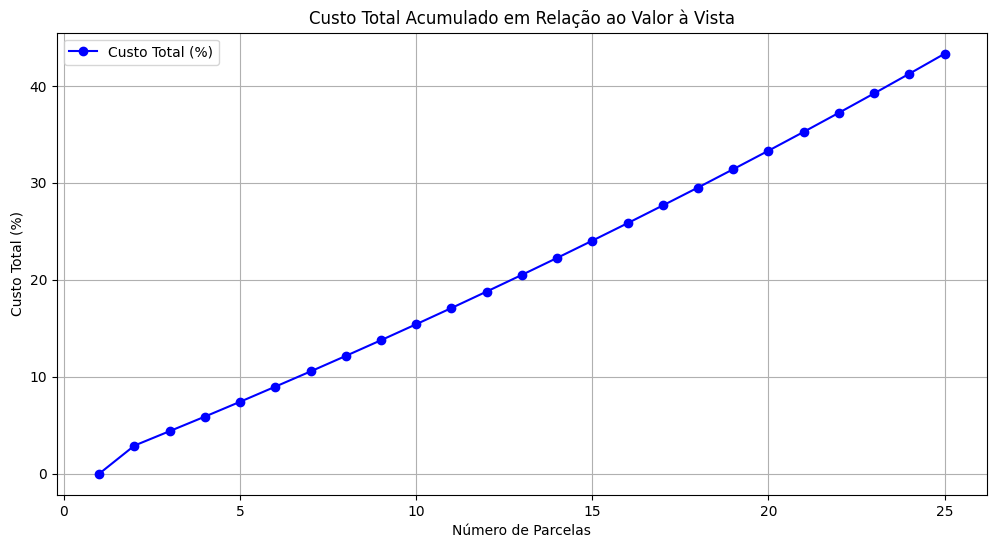

In [4]:
# 4.1 Gráfico: Custo Total (%) vs Número de Parcelas
plt.figure(figsize=(12, 6))
plt.plot(parcelas_data["Número de Parcelas"], parcelas_data["Custo Total (%)"],
         marker="o", linestyle='-', color='blue', label="Custo Total (%)")
plt.title("Custo Total Acumulado em Relação ao Valor à Vista")
plt.xlabel("Número de Parcelas")
plt.ylabel("Custo Total (%)")
plt.grid(True)
plt.legend()
plt.show()



#### 4.2 Gráfico: Valor Mensal Médio (R$) vs Número de Parcelas

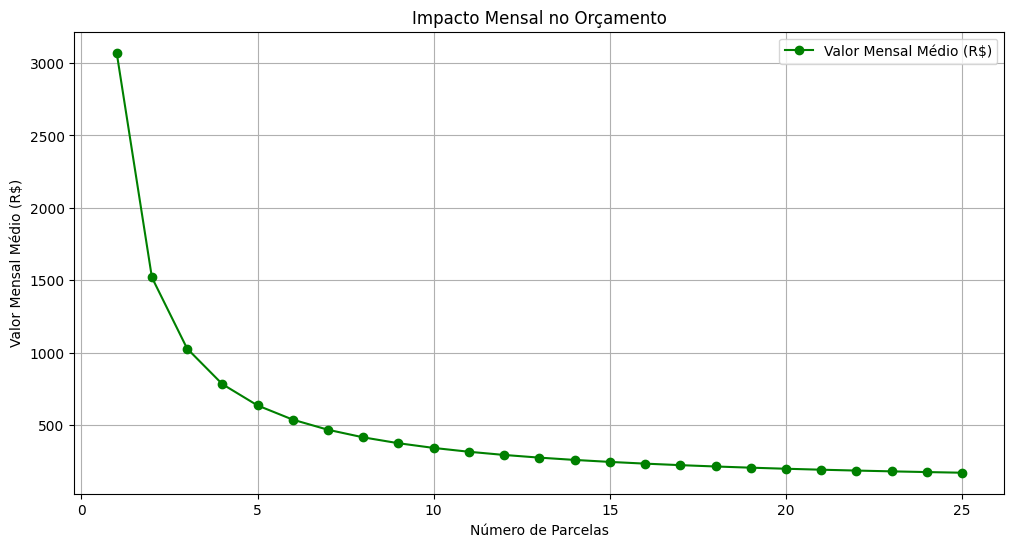

In [5]:
# 4.2 Gráfico: Valor Mensal Médio (R$) vs Número de Parcelas
plt.figure(figsize=(12, 6))
plt.plot(parcelas_data["Número de Parcelas"], parcelas_data["Valor Mensal Médio (R$)"],
         marker="o", linestyle='-', color='green', label="Valor Mensal Médio (R$)")
plt.title("Impacto Mensal no Orçamento")
plt.xlabel("Número de Parcelas")
plt.ylabel("Valor Mensal Médio (R$)")
plt.grid(True)
plt.legend()
plt.show()



#### 4.3 Gráfico: Taxa de Juros Implícita Mensal (%) vs Número de Parcelas

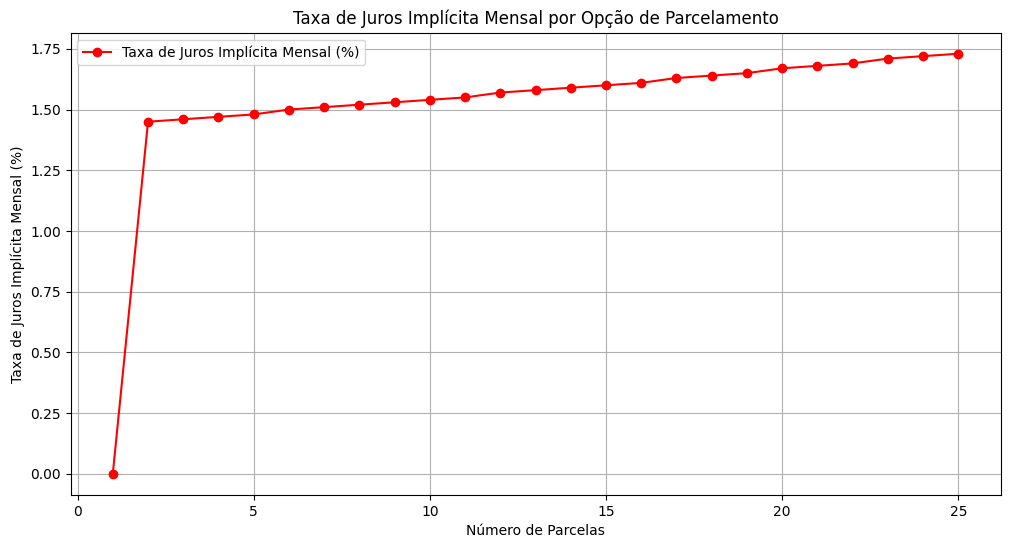

In [6]:
# 4.3 Gráfico: Taxa de Juros Implícita Mensal (%) vs Número de Parcelas
plt.figure(figsize=(12, 6))
plt.plot(parcelas_data["Número de Parcelas"], parcelas_data["Taxa de Juros Implícita Mensal (%)"],
         marker="o", linestyle='-', color='red', label="Taxa de Juros Implícita Mensal (%)")
plt.title("Taxa de Juros Implícita Mensal por Opção de Parcelamento")
plt.xlabel("Número de Parcelas")
plt.ylabel("Taxa de Juros Implícita Mensal (%)")
plt.grid(True)
plt.legend()
plt.show()



#### 4.4 Gráfico de Dispersão: Cruzamento entre Taxa de Juros e Valor Mensal Médio

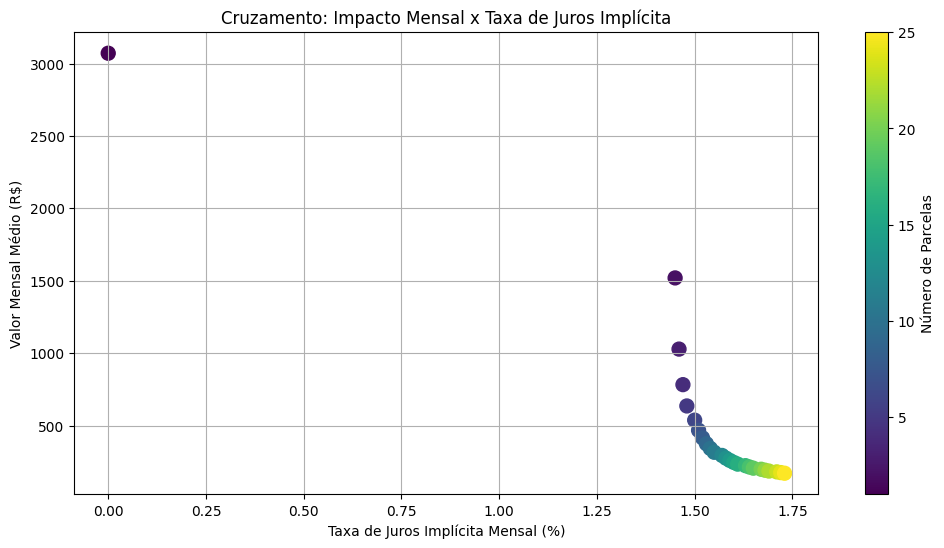

In [7]:
# 4.4 Gráfico de Dispersão: Cruzamento entre Taxa de Juros e Valor Mensal Médio
# Ordena os dados para melhor visualização
cruzado_data = parcelas_data[["Número de Parcelas", "Valor Mensal Médio (R$)", "Taxa de Juros Implícita Mensal (%)"]].copy()
cruzado_data = cruzado_data.sort_values(by=["Taxa de Juros Implícita Mensal (%)", "Valor Mensal Médio (R$)"])

plt.figure(figsize=(12, 6))
scatter = plt.scatter(cruzado_data["Taxa de Juros Implícita Mensal (%)"],
                      cruzado_data["Valor Mensal Médio (R$)"],
                      c=cruzado_data["Número de Parcelas"], cmap='viridis', s=100)
plt.colorbar(scatter, label="Número de Parcelas")
plt.title("Cruzamento: Impacto Mensal x Taxa de Juros Implícita")
plt.xlabel("Taxa de Juros Implícita Mensal (%)")
plt.ylabel("Valor Mensal Médio (R$)")
plt.grid(True)
plt.show()

### 5. Recomendação Final

In [8]:
print("\nRecomendação Final:")
print("Considerando o impacto mensal e o custo total, recomenda-se avaliar as opções "
      "de parcelamento a partir de 12 parcelas, onde o valor mensal médio torna-se mais "
      "acessível sem um acréscimo muito elevado no valor total. Analise também a taxa de "
      "juros implícita para tomar uma decisão consciente.")


Recomendação Final:
Considerando o impacto mensal e o custo total, recomenda-se avaliar as opções de parcelamento a partir de 12 parcelas, onde o valor mensal médio torna-se mais acessível sem um acréscimo muito elevado no valor total. Analise também a taxa de juros implícita para tomar uma decisão consciente.
